# Проект: сеть фитнес-центров 
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.
Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.
Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Наша задача — провести анализ и подготовить план действий по удержанию клиентов.
## Описание данных 
«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:'Churn' — факт оттока в текущем месяце;


Текущие поля в датасете:
* Данные клиента за предыдущий до проверки факта оттока месяц:
    * 'gender' — пол;
    * 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
    * 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
    * Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
    * 'Phone' — наличие контактного телефона;
    * 'Age' — возраст;
    * 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
* Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
    * 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
    * 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
    * 'Group_visits' — факт посещения групповых занятий;
    * 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
    * 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
    * 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.
## Загрузка данных


In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans



In [2]:



df=pd.read_csv('/datasets/gym_churn.csv')
#сразу приведем названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()
print(df.head())
print(df.info())
print(df.duplicated().sum())


   gender  near_location  partner  promo_friends  phone  contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   group_visits  age  avg_additional_charges_total  month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   lifetime  avg_class_frequency_total  avg_class_frequency_current_month  \
0  

Видим, что в данных нет пропусков, типы данных в полном порядке. 


## Исследовательский анализ данных
### Посмотрим на датасет: есть ли в нем отсутствующие признаки, изучим средние значения и стандартные отклонения. Сделаем это с помощью метода describe()

In [3]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


По данной табличке можно сделать несколько выводов. Например, среднее значение для пола у нас 0,51, это показывается, что мужчин и женщин в нашей выборке примерно одинаковое количество. Меньше(но не сильно) половины нашей аудитории является сотрудниками компании-партнера клуба. Почти все наши клиенты оставили свой номер телефона, около 90%, это замечатльно, можно делать смс-рассылку или позвонть им и узнать уехали они отдыхать на бали и еще вернуться, или ушли навсегда  😞. В среднем длина приобретаемого абонимента у нас около 4 месяцев( но на сколько я поняла такого варианта у нас нет, из ближайщего либо 3 месяца, либо пол года), так что скорее всего чаще всего преобретают абонименты на пол года или на 3 месяца. Либо цены на такие тарийы наиболее выгодны, либо это просто более целесообразно для клиентов, если они куда-то захотят уехать или перестать ходить в наш зал. Так же видно, что в среднем и до конца абонимента у наших клиентов примерно столько же месяцев. Значит ли это, что в нашей выборке большинство клинетов только приобрели свои абонименты? Пока не ясно... Однако можно заметить, что время с момента первого обращения в фитнес-центр в среднем равно 3,7, но видно, что это число получено скорее из-за выбрасов, находящихся за пределом 3 квартиля.  Средний возраст клиента - 29 лет. То есть наша целевая аудитория - молодые, энергичные и современные люди, может быть среди них есть молодые мамы, которые хотят после беременности похудеть или просто подтянуть тело. Это можно учесть при планировании рекламы или каких-то акций. Распределение выручки от других услуг нашего фитнес-центра распределена кажется равномерно, но мы еще посмотрим это на графике. Количество посещений в среднем и в среднем в месяц примерно одинакого, значит есть здесь какая-то регулярность.



   
Хотелось бы обратить внимание, например, на переменные Age и Avg_additional_charges_total. У них очень разные по величине стандартные отклонения.
Это говорит о том, что переменные нужно стандартизировать перед обучением. Для логистической регрессии и дерева это не обязательно, но вообще это уже такое внегласное правило. 
    


### Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался. Воспользуемся методом groupby()

In [4]:

df.groupby('churn').agg('mean')


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Видно, что отток среди мужчин и среди женщин одинаковый. В возрасте отличия тоже незначительны, как и в расстоянии до фитнес-центра, разве что немного чаще уходят те, кто живет дальше. Серьезно влияет на отток, судя по данной таблице, длительность текущего абонимента, факт работы в комании-партнере, посещение групповых занятий, время до окончания абонимента и то, как давно этот клиент с нами.

### Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);

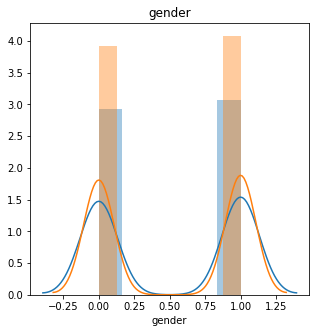

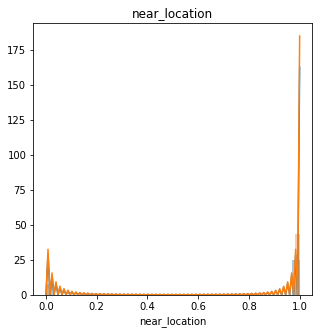

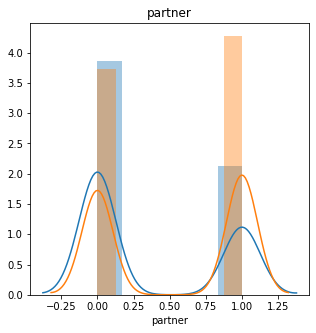

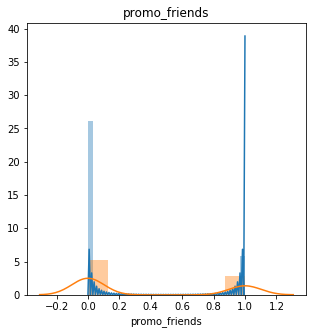

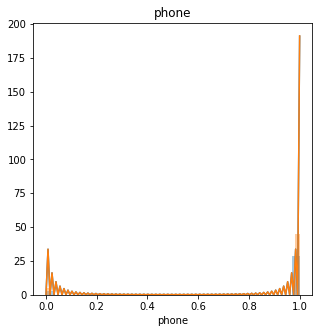

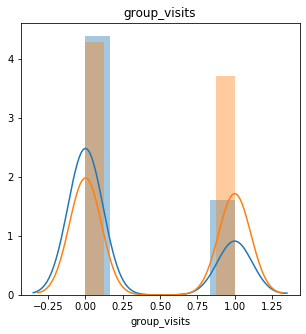

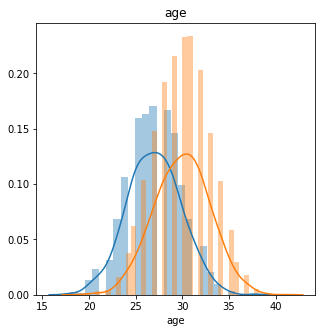

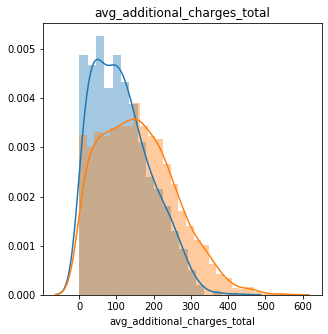

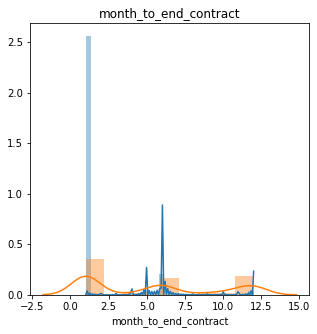

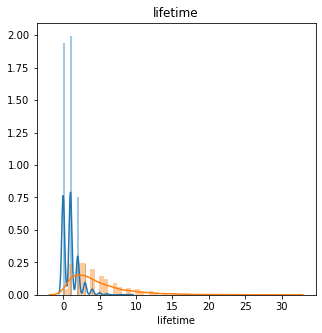

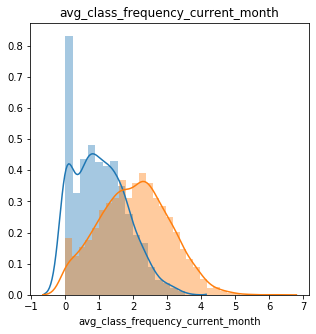

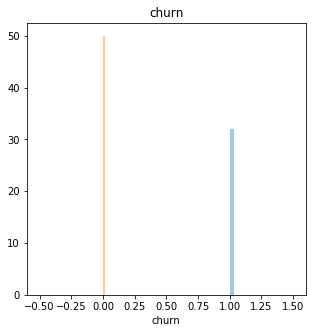

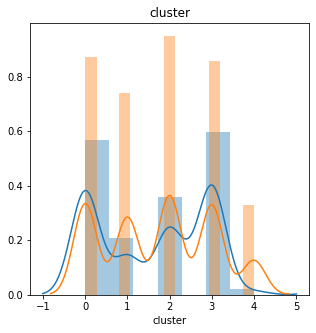

In [24]:
df_1=df.query('churn==1')
df_2=df.query('churn==0')
for column in df.columns:
    plt.figure(figsize=(5, 5))
    sns.distplot(df_1[column])
    sns.distplot(df_2[column])    
    plt.title(column)
    plt.show()


Вроде так, только я не совсем разобралась как отобразить на графиках, что какой означет цвет, потому что обычно указывала параметр hue и тогда отображалась картинка с пояснениями, а в distplot мне выдает ошибку, что он не имеет такого параметра(
Но по последнему графику видно, что оранжевый - это те, кто остался в фитнес клубе, а голубой - это отток.
    

    
    
По графикам видно, что у тех, кто уходит из клуба количество занятий в месяц и просто в среднем меньше, так же меньше у них lifetime, то есть тем, кто давно с нами не свойственно уходить. Все-таки видно, что возраст тоже немного влияет, молодые чуть чаще перестают ходить в фитнес-центр, видимо находят более инетересные варианты времяприпровождения.    


Видны выбросы в показателе "month_to_end_contract", "lifetime" и "avg_class_frequency_current_month". Скорее всего больше всего на отток влиет время с первого обращения, "старички"(клиенты, которые с нами давно) не так охотно уходят, так же влияет на отток время, на которое приобретен абонимент и сколько осталось до его окончания. 

### Построим матрицу корреляций и отобразим её.


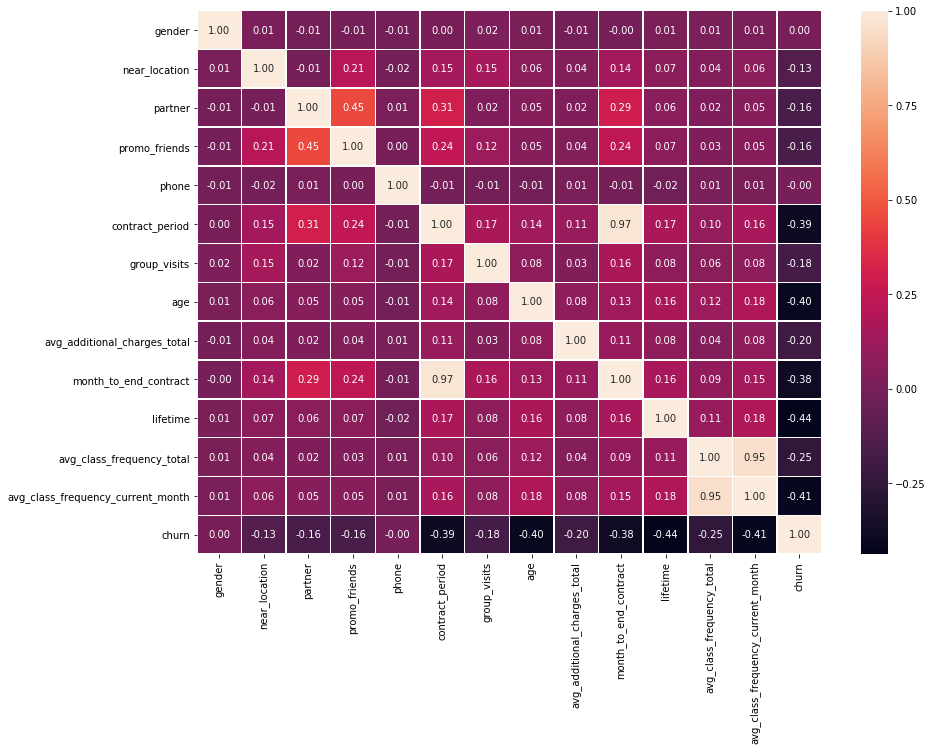

In [7]:
cm = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot = True, fmt = '0.2f', linewidths=.5)
plt.show()

In [8]:
df=df.drop('contract_period',1)
df=df.drop('avg_class_frequency_total',1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null float64
lifetime                             4000 non-null int64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int64
dtypes: float64(3), int64(9)
memory usage: 375.1 KB


По тепловой карте видно, что больше всего с оттоком коррелируют те же признаки, что я перечислила выше, а так же возраст, количество посещений в месяц. Так же видно, что у нас есть мультиколлинеарные признаки : длительность текущего абонимента <-> срок до оконачания текущего абонимента, количество посещений всего <-> количество посещений в месяц. И еще у нас есть метрики с нулевой корреляцией - номер телефона и пол.



## Построим модель прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце.
Разобьем данные на обучающую и валидационную выборку функцией train_test_split().

In [9]:
X = df.drop('churn', axis = 1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


Обучите модель на train-выборке двумя способами:
* логистической регрессией,
* случайным лесом.


Чем  в данном случае хорошая логическая регрессия: так как у нас отток измеряется 1 и 0, то можно считать целевая переменная здесь - бинарная величина. Мы пытаемся совершить расчет вероятности оттока клиентов в следующем месяце. Когда мы решаем задачу бинарной классификации, обращаясь к логистической регрессии, то преобразуем линейную регрессию для вычисления вероятности принадлежности к классу 1. 

In [10]:
model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
probabilities =  model.predict_proba(X_test)[:,1]

print('Accuracy : {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Accuracy : 0.92
Precision: 0.85
Recall: 0.83
F1: 0.84


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
df.groupby('churn')['gender'].count()

churn
0    2939
1    1061
Name: gender, dtype: int64

Доля правильных ответов - 0.93, что очень близко к 1. Но нужно понимать, что у нас не совсем соблюдается условия баланса классов, так как больше половины клиентов не уходят из фитнес-центра. Доля правильных ответов - 0.86, а полнота - 0.83, баланс между этими метриками - 0.85.

Попробуем обучить модель случайным лесом:


In [12]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st) 
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

print('Accuracy : {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))

Accuracy : 0.91
Precision: 0.85
Recall: 0.80
F1: 0.82


Доля правильных ответов - 0.92, что очень близко к 1. Доля правильных ответов - 0.84, а полнота - 0.81, баланс между этими метриками - 0.83.

Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели и решим какая модель показала себя лучше на основании метрик.

Если сравнивать метрики для обеих моделей на валидационной выборке, то видно, что доля правильных ответов отличается не так сильно, и для обоих моделей очень важно наличие сбалансированности классов. За ее неимением, смотря на показатели, предлагаю сделать вывод  в сторону логистической регрессии. 




## Сделаем кластеризацию клиентов
Стандартизируем данные.

In [13]:
df_sс = df.drop(['churn'], axis=1)

scaler = StandardScaler() # создаём объект класса scaler (нормализатор)
X_sc = scaler.fit_transform(df_sс) # обучаем нормализатор и преобразуем набор данных 



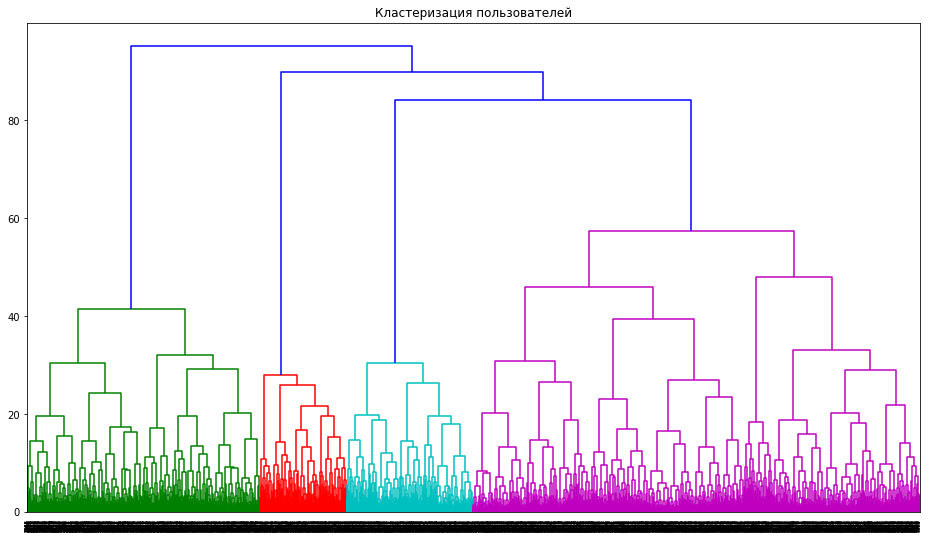

In [14]:
linked = linkage(X_sc, method = 'ward')

plt.figure(figsize=(16, 9))  
dendrogram(linked, orientation = 'top')
plt.title('Кластеризация пользователей')
plt.show()

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. 

In [15]:
km = KMeans(n_clusters = 5, random_state= 23) # задаём число кластеров, равное 5
labels = km.fit_predict(df_sс) # применяем алгоритм к данным и формируем вектор кластеров 
df['cluster'] = labels
df.cluster.value_counts() 

3    1033
0    1028
2     962
1     706
4     271
Name: cluster, dtype: int64

In [16]:
df.groupby('cluster').mean().T# посмотрим на средние значения признаков для кластеров


cluster,0,1,2,3,4
gender,0.514591,0.521246,0.511435,0.508228,0.468635
near_location,0.839494,0.881020,0.844075,0.824782,0.856089
partner,0.451362,0.511331,0.495842,0.488867,0.516605
promo_friends,0.280156,0.347025,0.320166,0.293320,0.332103
phone,0.897860,0.898017,0.902287,0.908035,0.926199
group_visits,0.407588,0.433428,0.423077,0.387222,0.431734
age,28.976654,29.344193,29.401247,28.906099,29.845018
avg_additional_charges_total,105.966990,250.984767,174.873445,35.634787,356.481960
month_to_end_contract,3.990272,5.001416,4.376299,3.861568,5.383764
lifetime,3.546693,4.169972,3.749480,3.392062,4.420664


Давайте разберемся с характерыми признаками для этих класстеров. В среднем меньший отток клиентов идет по кластерам 1 и 4, кластеры не равнозначны по количеству клиентов и по доле оттока клиентов. Самый больший отткок идет по 3 кластеру. Примерно одинаковый отток по кластерам 0 и 2.

Признаки "хорошего кластера":
* возрастом — он больше( у 4 кластера  lifetime больше, чем у остальных)
* 4 кластер выделяется длительностью абонемента, он значительно больше, чем у 0,2,3 и немного, но все же больше, чем у 1 кластера
* у кластеров 1 и 4 траты на дополнительные услуги больше
* средняя частота посещений в неделю за предыдущий месяц у 1 и 4 кластера тоже выше



Признаки "плохого кластера":
* небольшие траты на доп услуги, значительно меньше, чем у других кластеров
* небольшое время до окончания контракта
* небольшой lifetime, они просто не успели к нам привязаться))
* почти не посещают групповые занятия
* не являются работниками компаний партнеров - не имеют скидки!


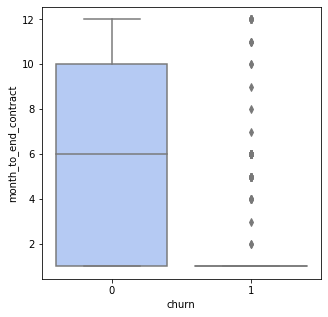

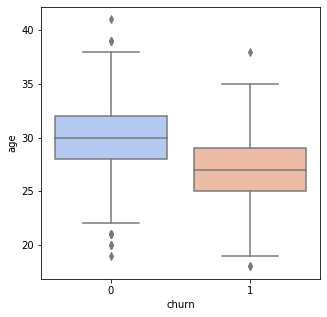

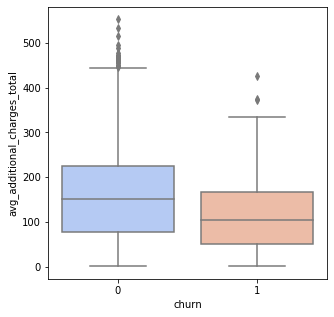

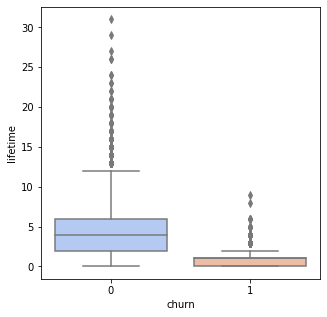

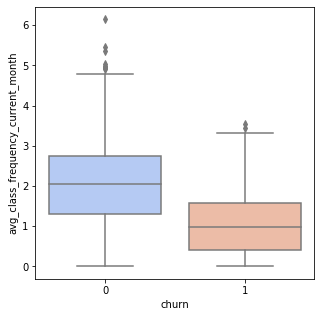

In [17]:
for column in ['month_to_end_contract', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_current_month']:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x = 'churn', y = df[column], data = df, palette="coolwarm")
    plt.show()


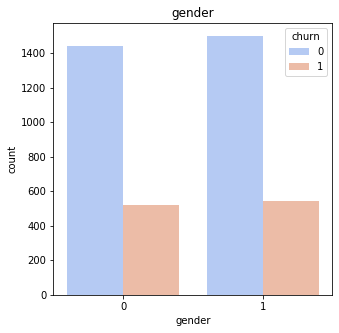

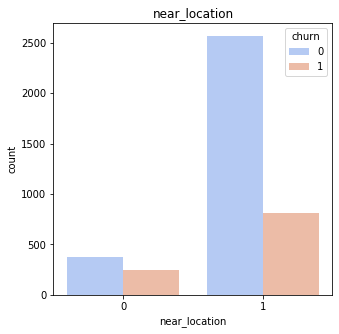

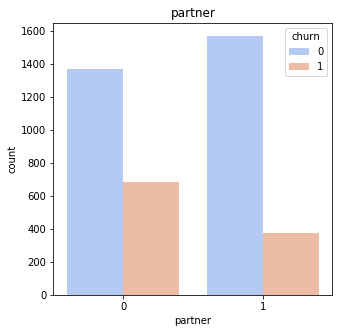

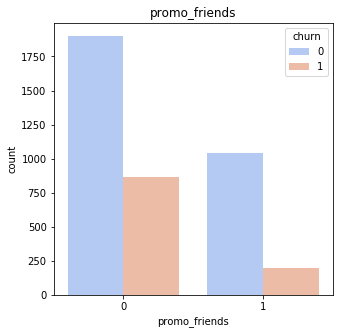

In [18]:
for column in ['gender', 'near_location', 'partner', 'promo_friends']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = df[column], hue='churn', data=df,palette="coolwarm")
    plt.title(column)
    plt.show()


Для части признаков построила боксплоты, потому что они показательнее, а для признаков, где вариант только 1 или 0, решила использовать countplot(), потому что нормальные боксплоты по ним не строятся, а гистограммы не показались еще менее показтельными)


Графики распределения не говорят особо ничего нового, разве что у 2-го кластера показатели почти везде ниже, чем у остальных кластеров( правда что это дает?), остальное вроде все уже сказано...

Для каждого полученного кластера посчитаем долю оттока. Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

In [19]:
df.groupby('cluster')['churn'].mean().T# посмотрим на средние значения признаков для кластеров


cluster
0    0.334630
1    0.178470
2    0.226611
3    0.349468
4    0.044280
Name: churn, dtype: float64

если это верные значения, то можно сказать, что отток больше всего в 0 и 3 кластере, а меньше всего в 4, это если получается смотреть в % соотношении. Или нет, немного запуталась((



# Выводы 

При разработке стратегии для работы с клиентами и удержания их, стоит обратить внимание на показатели для наших "хороших кластеров" и попытаться для других кластеров приблизить показатели к тем, что есть в "хороших". Так же стоит поддерживать и мотвировать "хорошие кластеры". 
Так как мы выяснили, что отток больше всего зависит от длительности абонимента, времени до его окончания и того, как долго клиент уже с нами, может быть стоит ввести какие-то акции для новых клиентов или сделать скидки для тех, кто отзанимается какой-то период и так далее. Можно попробовать более детально отсегментровать клиетов, которые оттекают из фитнес-клуба и рассмотреть какие признаки больше или меньше влияют на отток.


В результате нашего исследования мы выяснили, что часто клиенты уходят, когда остается не так много до окончания абонимента. Может стоит начать отслеживать этот показатель, и когда срок аббонимента подходит к концу напоминать о существующих акциях, предлагать скидку на продление абонимента и так далее. Так же стоит пользоваться тем, что у нас есть номера телефонов клиентов и переодически ознакомлять их с акциями, скидками, может мероприятиями, которые происходят в фитнес-клубы. Было заметно, что те, кто редко посещают групповые занятия, чаще уходят. Групповые занятия заряжают и мотивируют, может стоит чуть больше вкладываться в их рекламу и сделать акцент на них. Так же стоит поощерять регулярность занятий, может давать какие-то купоны или скидки на доп услуги.


